In [1]:
# This dataset has data of the world climatic conditons on daily basis for 2020. We intend to predict the percipitation intensity
# based on other climatic conditions.

In [2]:
df = read.csv("C:\\Users\\hp\\Downloads\\all_countries_weather\\daily_weather_2020.csv")

In [78]:
library(ggplot2)
library(MASS)
library(pastecs)
library(heatmaply)
library(naniar)
library(Hmisc)
library(ggplot2)
library(tidyr)
library(GGally)
library(corrplot)
    # For Linear regression 
library(caTools)
library(dplyr)
library(readxl)
library(caret)

In [81]:
# Data Extraction

In [82]:
# Here we drop off the columns which doesnt fit our motive and have least effect on calculating precipitation
# Thus we remove X, Country.Region, Province.State, time, summary, icon, precipType as they are characters with numerous values
# as well they have least affect on percipitation

In [3]:
new_df = subset(df, select = -c(X, Country.Region, Province.State, time, summary, icon, precipType))

In [85]:
# Now that we have all numeric values, we further untend to perform Data Cleansing where we deal with missing values and outlier

In [4]:
new_df$sunriseTime[is.na(new_df$sunriseTime)]<-mean(new_df$sunriseTime,na.rm=TRUE)

In [5]:
new_df$sunsetTime[is.na(new_df$sunsetTime)]<-mean(new_df$sunsetTime,na.rm=TRUE)

In [6]:
new_df$precipIntensityMaxTime[is.na(new_df$precipIntensityMaxTime)]<-mean(new_df$precipIntensityMaxTime,na.rm=TRUE)

In [7]:
new_df = subset(new_df, select = -c(precipAccumulation))

In [8]:
# Data Redundancy and Transformation
# Here we remove the redundant and covariant variables and further transform the data and bring all the variables to same scale

In [9]:
corMatrix = round(cor(new_df), 3)

In [10]:
x = which(corMatrix[,7]<0.02 & corMatrix[,7]>-0.02)

In [ ]:
# As KNN is a distance-based algorithm, we normaloze the data with an intention to supress the effects of outliers to an extent
# as well as using using Min-Max normalization will scale the range of all the variables, distribution between 0 and 1, thus to
# give equal weightage to every feature

In [11]:
new_df_1 = new_df[,-c(x)]

In [99]:
normalize <- function(x) {
return ((x - min(x)) / (max(x) - min(x))) }

In [100]:
new_df_1_sub = as.data.frame(lapply(new_df_1[,2:19], normalize))

In [101]:
summary(new_df_1_sub)

 precipIntensityMax  precipProbability temperatureHigh  temperatureLow  
 Min.   :0.0000000   Min.   :0.0000    Min.   :0.0000   Min.   :0.0000  
 1st Qu.:0.0003122   1st Qu.:0.0600    1st Qu.:0.6350   1st Qu.:0.6420  
 Median :0.0023414   Median :0.1600    Median :0.7380   Median :0.7423  
 Mean   :0.0156285   Mean   :0.3005    Mean   :0.7283   Mean   :0.7404  
 3rd Qu.:0.0150628   3rd Qu.:0.5000    3rd Qu.:0.8359   3rd Qu.:0.8679  
 Max.   :1.0000000   Max.   :1.0000    Max.   :1.0000   Max.   :1.0000  
 apparentTemperatureLow    dewPoint         humidity         pressure     
 Min.   :0.0000         Min.   :0.0000   Min.   :0.0000   Min.   :0.0000  
 1st Qu.:0.6416         1st Qu.:0.6743   1st Qu.:0.5816   1st Qu.:0.5674  
 Median :0.7315         Median :0.7602   Median :0.7245   Median :0.6051  
 Mean   :0.7288         Mean   :0.7673   Mean   :0.6793   Mean   :0.6124  
 3rd Qu.:0.8410         3rd Qu.:0.8951   3rd Qu.:0.8163   3rd Qu.:0.6560  
 Max.   :1.0000         Max.   :1.0000 

In [102]:
# As we have removed the columns with least correlation, we further cube root transform the response data to rescale it.

In [103]:
new_df_1_cube = sign(new_df_1[,1])*((abs(new_df_1[,1]))^(1/3))

In [104]:
# we split the data in 80 20 proportion

In [181]:
set.seed(400)
indexes = createDataPartition(new_df_1[,1], p = .80, list = F)
train = new_df_1[indexes, ]
test = new_df_1[-indexes, ]


train_x = train[,-1]
train_y = train[,1]

test_x = test[, -1]
test_y = test[,1]

In [185]:
train_x

,precipIntensityMax,precipProbability,temperatureHigh,temperatureLow,apparentTemperatureLow,dewPoint,humidity,pressure,windSpeed,windGust,cloudCover,uvIndex,visibility,ozone,temperatureMin,apparentTemperatureMin,Lat,Long
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,0.1515,0.71,48.36,32.13,29.04,23.88,0.60,1019.1,2.56,6.60,0.99,2,5.534,372.6,32.96,30.51,33,65
2,0.0985,0.95,40.42,28.90,26.27,33.61,0.90,1021.2,2.06,7.08,0.99,2,1.192,330.2,32.33,29.84,33,65
6,0.0442,0.91,44.54,28.10,22.90,34.56,0.85,1016.7,2.60,7.68,0.74,3,5.383,323.1,34.89,32.83,33,65
8,0.0002,0.03,44.69,26.65,21.20,10.64,0.41,1025.3,5.06,13.91,0.00,3,10.000,319.7,23.66,15.87,33,65
9,0.0001,0.01,48.08,24.53,18.64,6.56,0.31,1023.1,3.56,7.66,0.01,3,10.000,322.0,26.65,21.20,33,65
10,0.0003,0.02,45.21,30.78,26.53,7.94,0.34,1023.4,3.79,8.06,0.39,3,10.000,317.2,24.53,18.64,33,65
11,0.0340,0.75,40.02,31.64,30.79,27.14,0.76,1019.9,2.80,7.88,1.00,2,3.269,313.1,30.78,26.53,33,65
12,0.0954,0.88,37.52,25.23,24.23,30.29,0.89,1013.7,2.76,7.99,0.99,2,0.405,320.7,28.38,27.19,33,65
13,0.0065,0.34,34.74,20.15,14.37,22.14,0.78,1019.4,2.76,6.54,0.76,3,5.515,336.9,22.92,17.48,33,65


In [182]:
(nrow(train_x))^(1/2)

[1] 156.6908

In [ ]:
# Further we, to choose the optimal number of K, we compare the RMSE for different K-values

In [202]:
knnfunc = function(k_no){
    knnmodel = knnreg(train_x, train_y, k_no)
    pred = predict(knnmodel, data.frame(test_x))
    return (pred)
}

In [203]:
k_no = c(1,2,3,4,5,6,7,8,9,10,100,200,156)

In [204]:
output = sapply(k_no, knnfunc)

In [205]:
x = c(1:length(k_no))

In [112]:
summary(knnmodel_2)

        Length Class  Mode   
learn   2      -none- list   
k       1      -none- numeric
theDots 0      -none- list   

In [113]:
pred_y_1 = predict(knnmodel_1, data.frame(test_x))

In [209]:
evaluator = function(x){
    rmse = caret::RMSE(test_y, output[,x])
    return (cat(" RMSE: ",rmse))
}

In [ ]:
# EValuating the model using it RMSE for different values of K

In [210]:
op = sapply(x, evaluator)

 RMSE:  0.0096288 RMSE:  0.008595631 RMSE:  0.008309501 RMSE:  0.008287401 RMSE:  0.00820521 RMSE:  0.008190637 RMSE:  0.008239507 RMSE:  0.008292771 RMSE:  0.008323426 RMSE:  0.008359248 RMSE:  0.009184396 RMSE:  0.009529889 RMSE:  0.009404239

In [156]:
K_values = c(1,2,3,4,5,6,7,8,9,10)
RMSE_values = c(0.0096288, 0.008595631, 0.008309501, 0.008287401, 0.00820521, 0.008190637, 0.008239507, 0.008292771, 0.008323426, 
               0.008359248)

In [157]:
df_k = data.frame(K_values, RMSE_values)

In [159]:
df_k

K_values,RMSE_values
<dbl>,<dbl>
1,0.009628800
2,0.008595631
3,0.008309501
4,0.008287401
5,0.008205210
6,0.008190637
7,0.008239507
8,0.008292771
9,0.008323426


In [ ]:
# RMSE for different K-values, shows that K = 6, has least RMSE

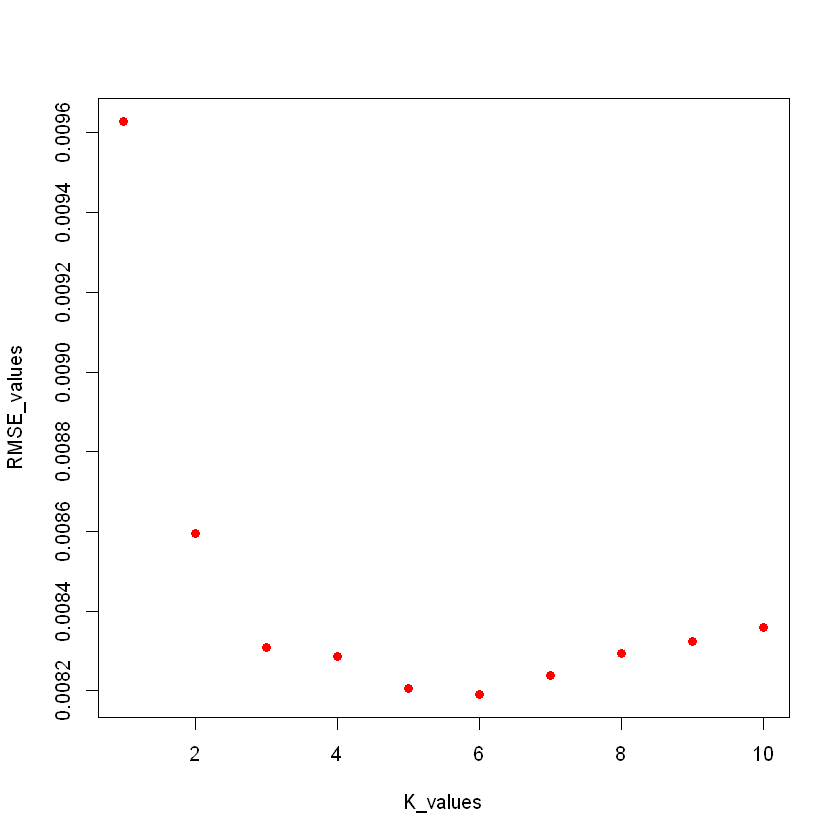

In [177]:
plot(df_k, col = 'red', pch = 19)

In [117]:
# As lower the RMSE, better is the model, we can see k = 6, has lowest RMSE value, thus we choose k=6

In [118]:
# This is the final model.

In [183]:
knnmodel = knnreg(x = train_x, y = train_y, k = 6)
    pred = predict(knnmodel, data.frame(test_x))

In [187]:
mse = mean((test_y - pred)^2)
mae = caret::MAE(pred, test_y)
rmse = caret::RMSE(pred, test_y)
R2 = caret::R2(pred,test_y)
cat("R-sqaured: ",R2, "MSE: ", mse, "MAE: ", mae, " RMSE: ", rmse)

R-sqaured:  0.4313803 MSE:  6.708653e-05 MAE:  0.003512344  RMSE:  0.008190637

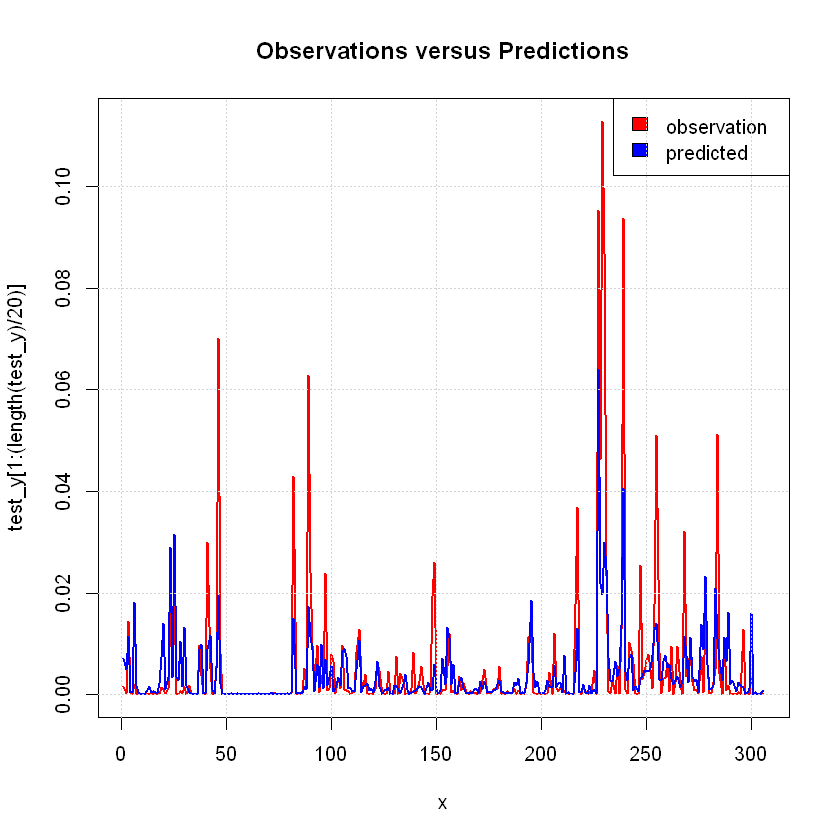

In [162]:
x = 1:length(test_y[1:(length(test_y)/20)])

plot(x, test_y[1:(length(test_y)/20)], col = "red", type = "l", lwd=2,
     main = "Observations versus Predictions")
lines(x, pred[1:(length(pred)/20)], col = "blue", lwd=2)
legend("topright",  legend = c("observation", "predicted"), 
       fill = c("red", "blue"), col = 2:3,  adj = c(0, 0.6))
grid()

In [13]:
Model = c('MLR', 'KNN')
Rsqaured = c(0.9361423, 0.4313803)
MSE = c(0.00047238, 6.704781e-05)
RMSE = c(0.02191, 0.008190637)
MAE = c(0.0158465444146779, 0.003512344)

In [14]:
df_1 <- data.frame(Model,Rsqaured,MSE,RMSE,MAE)

In [15]:
df_1

Model,Rsqaured,MSE,RMSE,MAE
<chr>,<dbl>,<dbl>,<dbl>,<dbl>
MLR,0.9361423,4.723800e-04,0.021910000,0.015846544
KNN,0.4313803,6.704781e-05,0.008190637,0.003512344


In [ ]:
# According to, above observations MLR has better R2, while KNN performs better on test data, can be problem of overfit or 
# underfit